In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import sklearn

import seaborn as sns

In [3]:
bean = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\Dry_Bean_Dataset.csv')

bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
bean['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
new_bean = bean.replace({'SEKER':0, 'BARBUNYA':1, 'BOMBAY':2, 'CALI':3, 'HOROZ':4, 'SIRA':5, 'DERMASON':6})

new_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [7]:
X = new_bean.iloc[:, 0:-1]
y = new_bean['Class']

X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [15]:
# We need to standardize some of the attributes like Area, ConvexArea, Perimeter and so on to make it suitable for algorithm implementation.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X
X_scaled[['Area','Perimeter', 'MajorAxisLength',	'MinorAxisLength', 'ConvexArea', 'EquivDiameter']] = scaler.fit_transform(X_scaled[['Area','Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']])

X_scaled

# df[df.columns] = scaler.fit_transform(df[df.columns])

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,1.197191,0.549812,-0.841451,-1.063341,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,-0.829188,-1.013924,-1.395911,-0.434445,1.097356,0.411785,-0.826102,-1.044217,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,-0.807157,-1.078829,-1.252357,-0.585735,1.209713,0.562727,-0.808704,-1.008084,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,-0.785741,-0.977215,-1.278825,-0.439290,1.153638,0.498616,-0.773975,-0.973337,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,-0.781239,-1.097384,-1.380471,-0.266663,1.060798,0.333680,-0.784286,-0.966080,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,1.552728,0.765002,-0.378191,-0.364148,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,-0.373334,-0.456336,-0.450053,-0.257015,1.476439,0.735702,-0.378662,-0.363962,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,-0.372038,-0.447833,-0.450478,-0.246456,1.472582,0.734065,-0.376143,-0.362197,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,-0.371765,-0.427029,-0.428974,-0.266742,1.489326,0.741055,-0.372851,-0.361825,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

In [17]:
DT0 = DecisionTreeClassifier(max_depth=15, random_state=0)
DT0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

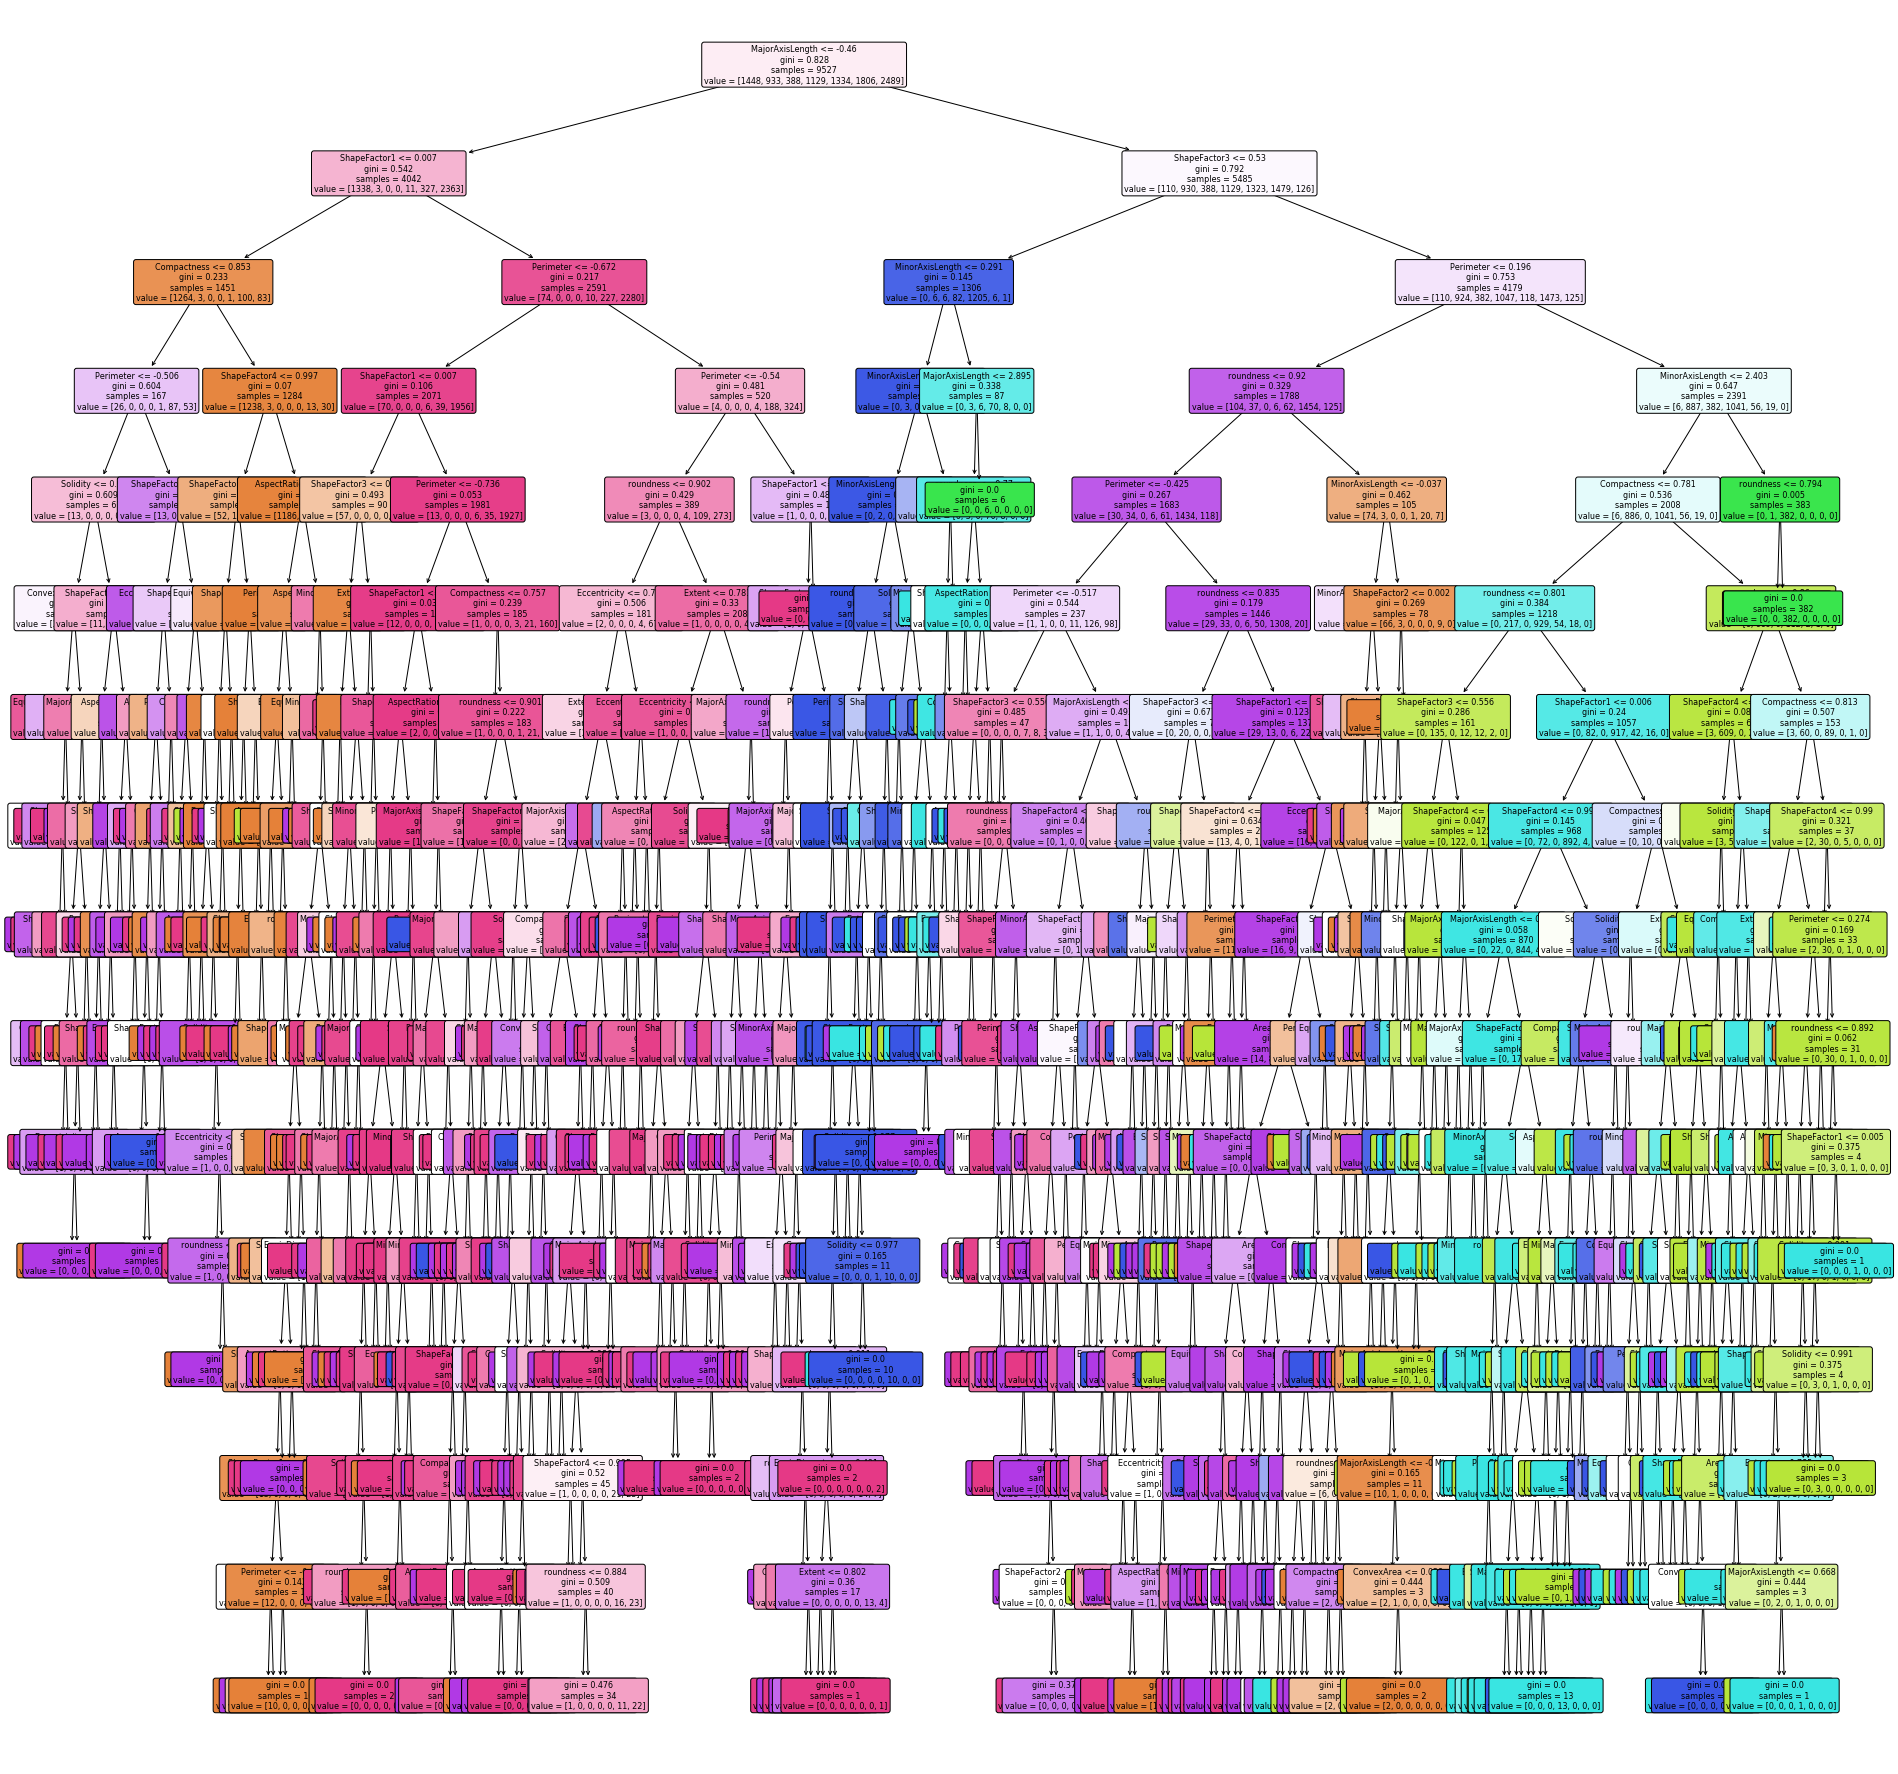

In [34]:
X_col = X_scaled.columns

plt.figure(figsize=(32, 32))
a = sklearn.tree.plot_tree(DT0,
                   feature_names = X_col,
                   rounded = True,
                   filled = True, 
                   fontsize=8)
plt.show()



In [41]:
y_pred = DT0.predict(X_test)
y_true = y_test


print('The accuracy score is: {a}; the precision score (on a macro averaged basis, the same as the following two index) is: {b}; the recall score is: {c}; and the f1 score is {d}'.format(
    a = accuracy_score(y_true=y_true, y_pred=y_pred), 
    b = precision_score(y_true=y_true, y_pred=y_pred, average='macro'), 
    c = recall_score(y_true=y_true, y_pred=y_pred, average='macro'), 
    d = f1_score(y_true=y_true, y_pred=y_pred, average='macro')))


The accuracy score is: 0.8981390793339863; the precision score (on a macro averaged basis, the same as the following two index) is: 0.913388029670753; the recall score is: 0.9132628420983651; and the f1 score is 0.9133077245188307


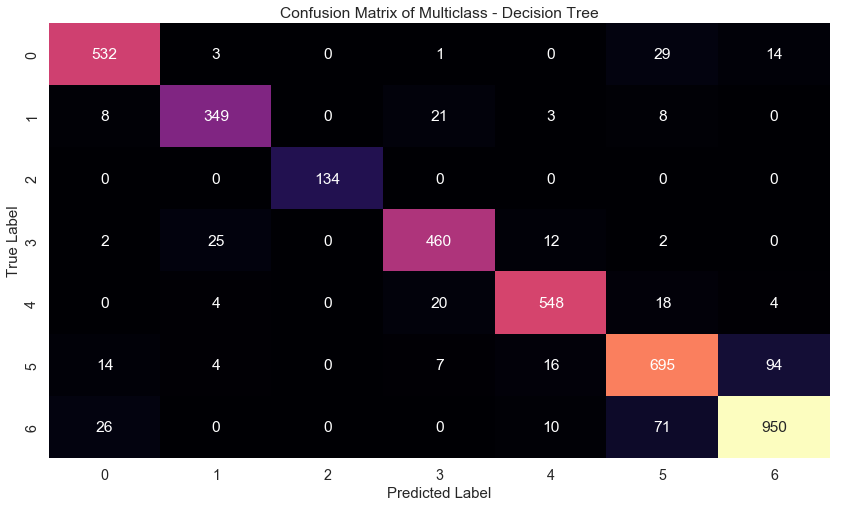

In [46]:
# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(14, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix of Multiclass - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
#ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
#ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

##### So from the accuracy score, precision score, recall score and f1 score, we find the model is performing well in classifying different types of dry beans.

##### Also from the confusion matrix plot, it shows most samples are classified into the right label.

In [47]:
# Then, we will use xgboost to model the same dataset to see its result.

from xgboost.sklearn import XGBClassifier

xgb0 = XGBClassifier(n_estimators = 150, learning_rate = 0.05, max_depth = 5)

xgb0.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [48]:
y_pred_2 = xgb0.predict(X_test)

In [49]:
print('The accuracy score is: {a}; the precision score (on a macro averaged basis, the same as the following two index) is: {b}; the recall score is: {c}; and the f1 score is {d}'.format(
    a = accuracy_score(y_true=y_true, y_pred=y_pred_2), 
    b = precision_score(y_true=y_true, y_pred=y_pred_2, average='macro'), 
    c = recall_score(y_true=y_true, y_pred=y_pred_2, average='macro'), 
    d = f1_score(y_true=y_true, y_pred=y_pred_2, average='macro')))

The accuracy score is: 0.9316846229187071; the precision score (on a macro averaged basis, the same as the following two index) is: 0.9450390189394459; the recall score is: 0.9411659024792316; and the f1 score is 0.9428780813961672


#### Basically, we discovered the xgboost model achieves an overall better performance on the four scores compared with DecisionTree Classifier. We will also illustrate the predicting accuracy based on confusion matrix plot.

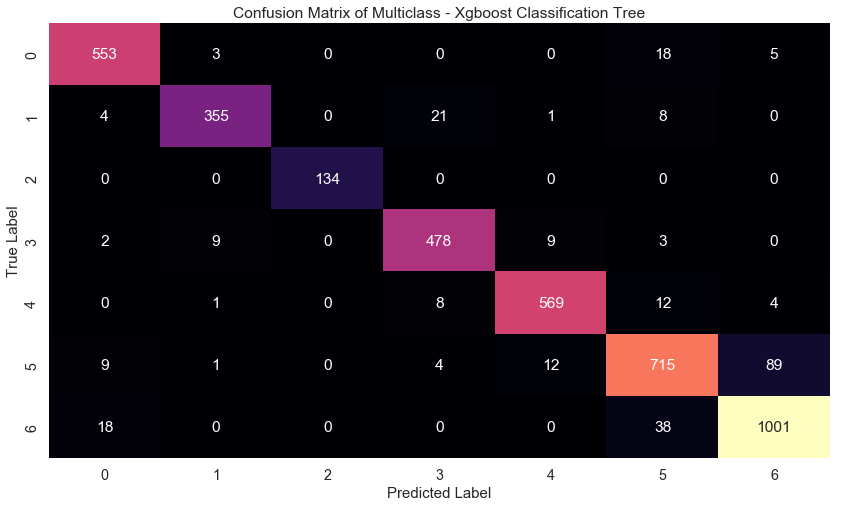

In [50]:
# The confusion matrix
confusion_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_2)

# Convert confusion matrix into dataframe
matrix_df_xgb = pd.DataFrame(confusion_matrix_xgb)


plt.figure(figsize=(14, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df_xgb,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix of Multiclass - Xgboost Classification Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
#ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
#ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

#### A rough glance tells that xgboost has a better performance on classifying different types of beans. Less samples are wrongly classified.